## Regression outlier effect.

<font face='georgia'> <h3> Objective:Visualization best fit linear regression line for different scenarios</h3> </font>

In [13]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.linear_model import SGDRegressor

In [14]:
import numpy as np
import scipy as sp
import scipy.optimize

def angles_in_ellipse(num,a,b):
    assert(num > 0)
    assert(a < b)
    angles = 2 * np.pi * np.arange(num) / num
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / num
        arcs = np.arange(num) * arc_size
        res = sp.optimize.root(
            lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles

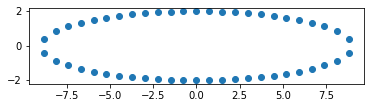

In [15]:
a = 2
b = 9
n = 50

phi = angles_in_ellipse(n, a, b)
e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
arcs = sp.special.ellipeinc(phi, e)

fig = plt.figure()
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(b * np.sin(phi), a * np.cos(phi))
plt.show()

In [16]:
np.random.seed(0)

In [17]:
X= b * np.sin(phi)
Y= a * np.cos(phi)

<pre>
<font face='georgia'>
<i>
1. We will be working on the regression problem and how regularization helps to get rid of outliers

2. Use the above created X, Y for this experiment.

3. We will implement our own SGDRegression with mean squared error

4. As a part of this experiment we will train our linear regression on the data (X, Y) with different regularizations alpha=[0.0001, 1, 100] and 
observe how prediction hyper plan moves with respect to the outliers

5. We will consider this list of outliers: [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)] in each of tuple the first elemet is the input feature(X) and the second element is the output(Y)

6. For each regularizer, we need to add these outliers one at time to data and then train our model again on the updated data. 

7. We will plot a 3*5 grid of subplots, where each row corresponds to results of model with a single regularizer.

8. Algorithm: 

for each regularizer:
    for each outlier:
        #add the outlier to the data
        #fit the linear regression to the updated data
        #get the hyper plane
        #plot the hyperplane along with the data points

</i>
</font>
</pre>

In [18]:
def squared_error(y_true,y_pred, alpha, W):
    loss = np.mean((y_true - y_pred) ** 2) + alpha * np.mean(W**2)
    return loss

def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    res = 1/(1+np.exp(-z))
    return res

# prediction function used to compute predicted_y given the dataset X
def pred(W,B, X):
    return W * X + B

In [19]:
def CustomSGDRegressor(data_X, data_Y, alpha, eta0, N, max_iter):
  # initialize weights
  # initialize the weights as 1d array consisting of all zeros similar to the dimensions of row_vector
  # use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
  # initialize bias to zero
  dim = data_X[0]
  W = np.zeros_like(dim)
  B = 0

  # initializing prev_loss
  loss = 0
  prev_loss = 1
  # fit function
  for iter in range(max_iter+1):
    for i, j in zip(X, Y):
      # gradient_w function
      dw = i * (j - sigmoid(np.dot(W.T, i) + B)) - (alpha/N)*W
      # gradient_b function
      db = j - sigmoid(np.dot(W.T, i) + B)
      # updating w
      W = W + (eta0 * dw)
      # updating b
      B = B + (eta0 * db)

    # predicting values
    X_pred = pred(W, B, data_X)
    Y_pred = pred(W, B, data_Y)

    # loss values
    prev_loss = loss
    loss = squared_error(data_Y, X_pred, alpha, W)
    if loss > prev_loss:
      break;

  return W, B, loss

In [20]:
alpha = 0.0001
N = len(X)
max_iter = 100
eta0 = 0.001
W, B, loss = CustomSGDRegressor(X, Y, alpha, eta0, N, max_iter)

In [21]:
print(W, B, loss)

-0.008287259194450912 -0.025028089865058282 2.596962612974031


In [22]:
clf = SGDRegressor(learning_rate='constant', random_state = 42)
clf.fit(X.reshape(-1,1), Y.reshape(-1,1))
clf_w = clf.coef_[0]
clf_b = clf.intercept_[0]

# as there is no attribute predict in SGDRegressor
# we apply custom predict for SGDRegressor
pred_clf = clf.predict(X.reshape(-1,1))
clf_loss = np.mean((Y-pred_clf)**2) + clf.alpha * np.mean(clf_w**2)

In [23]:
print(clf_w, clf_b, clf_loss)

0.1662580560046081 0.015574154594698407 3.381415042285817


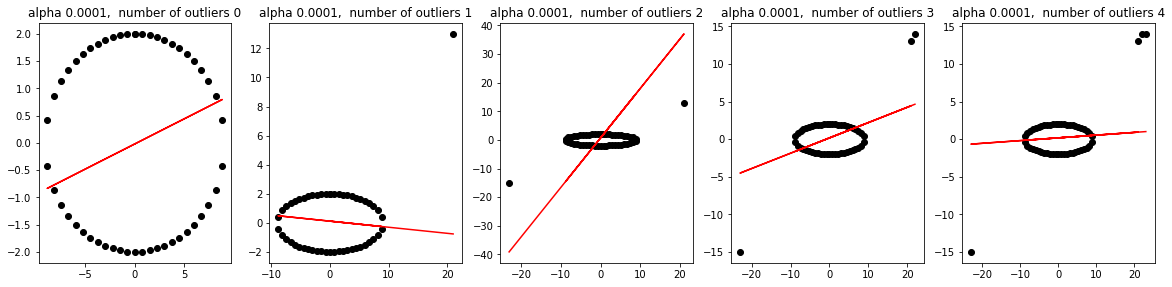

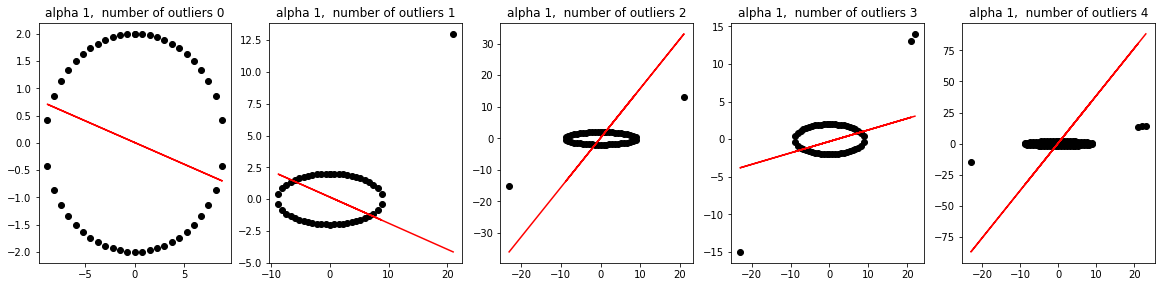

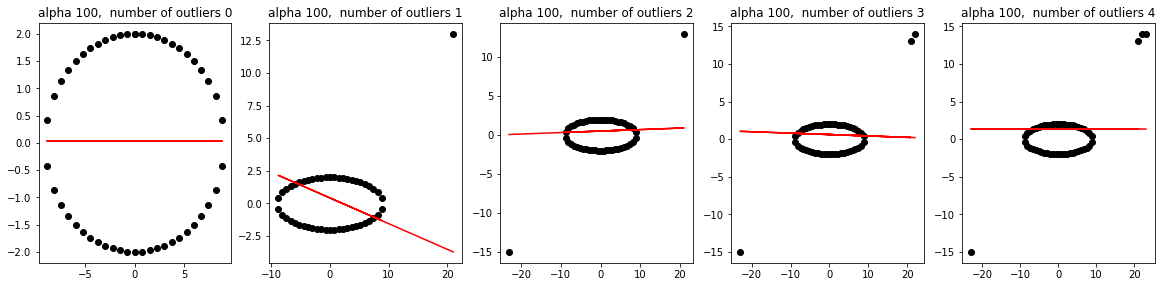

In [24]:
alphas = [0.0001,1,100]
outliers = [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)]

for idx,alpha in enumerate(alphas) :
  plt.figure(figsize=(20,15))
  X= b * np.sin(phi)
  Y= a * np.cos(phi)
  for id,outlier in enumerate(outliers):
    plt.subplot(3,len(outliers),id+1)
    # add outlier one by one
    X = np.append(X,outlier[0]).reshape(-1,1)
    Y = np.append(Y,outlier[1]).reshape(-1,1)

    # SGDRegressor
    clf = SGDRegressor(alpha=alpha, learning_rate='constant')
    clf.fit(X.reshape(-1,1), Y.reshape(-1,1))
    clf_w = clf.coef_[0]
    clf_b = clf.intercept_[0]
    
    SGDLine = clf_w * X + clf_b
    plt.scatter(X,Y, color='k')
    plt.plot(X, SGDLine, color='r')
    plt.title("alpha {},  number of outliers {}".format(alpha, id))
    
  plt.show()

### Observations:
- For **alpha=0.0001**, the hyperplane position doesn't seem to be skewed towards outliers but changes the tilt according to the position of outliers.
- For **alpha=1**, the hyperplane seems to get a little skewed towards the outliers and also changes the tilt according to the position of outliers.
- For **alpha=100**, the hyperplane seems to get skewed towards higher number of outliers and also changes the tilt according to the position of outliers.

- SGDRegressor is affected by number of outliers and may also may give biased results.
- As the regularization decreases the hyperplane get skewed towards outliers.